# K-Nearest Neighbor
K 와 가장 가까운 것을 찾는 것
<br>
data set의 특징(feature) = target class = 벡터 (= DB의 스키마, 열)<br>
feature space = x,y,z, ... 축으로 teature 가 들어간 figure<br>
<br>

K는 보통 홀수를 준다.<br>
새로운 데이터(행)가 들어오면 그 데이터를 feature space에 그린다.<br>
그려진 새로은 데이터와 가장 가까운 K개를 추출한다.<br>
추출된 K개 중 많은 결과를 예측 한다.<br>
<br>
<br>
가까운 K개를 찾는 방법.(배웠던 것 중..)<br>
Euclidean distance(두 점 사이의 최단 거리. 피타고라스의 정리)<br>
Manhattan distance(수직으로의 최단 거리. 상하좌우 이동)<br>
<br>
<br>
Hyper parameter = 사람이 조정해줘야 하는 것.<br>
K는 사람이 적절하게 조정해야 한다..(K는 Hyper parameter 이다.)<br>
optimization : 최적화.<br>
K 값을 조절해 가며 답을 찾아야 한다.<br>


decision boundary : https://wikidocs.net/4288

In [431]:
import matplotlib.pyplot as plt
import numpy as np
figsize = (7, 3)

In [29]:
# Euclidean & Manhattan distance 몸풀기
id5 = np.array([2.75, 7.5])
id12 = np.array([5.0, 2.5])
id17 = np.array([5.25, 9.5])

print(f'Manhattan distance 12 - 5 : {np.sum(np.abs(id5 - id12))}')
print(f'Euclidean distance 12 - 5 : {np.sum(np.square(id5 - id12))**0.5}')
print(f'Manhattan distance 12 - 17: {np.sum(np.abs(id17 - id12))}')
print(f'Euclidean distance 12 - 17: {np.sum(np.square(id17 - id12))**0.5}')

# 12 기준으로 5와 17의 distance 비교
# Manhattan distance는 둘다 같지만 Euclidean 에서 차이가 발생한다.
# 결과) distance의 기준을 항상 같은(이번엔 Manhattan) 기준으로 하면 적절하지 못할 수 있다. 

Manhattan distance 12 - 5 : 7.25
Euclidean distance 12 - 5 : 5.482928049865327
Manhattan distance 12 - 17: 7.25
Euclidean distance 12 - 17: 7.00446286306095


(array([ 3.,  1.,  6., 17., 19., 20., 14., 12.,  5.,  3.]),
 array([-34.52308045, -27.7924093 , -21.06173814, -14.33106699,
         -7.60039583,  -0.86972468,   5.86094648,  12.59161763,
         19.32228879,  26.05295994,  32.7836311 ]),
 <BarContainer object of 10 artists>)

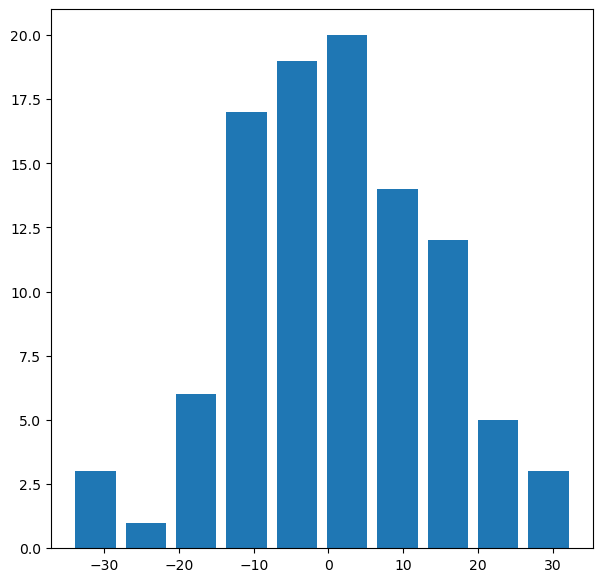

In [45]:
np.random.seed(1)
n_data = 100

x_data = np.random.normal(0, 15, n_data)

fig, ax = plt.subplots(figsize=figsize)
ax.hist(x_data, rwidth=0.8)

shape of x_data: (100, 1)
shape of y_data: (100, 1)
shape of xy_set: (100, 2)
shape of data: (100, 2)
mean : [4.94956058 3.04009761]
std  : [1.10653621 0.99964941]


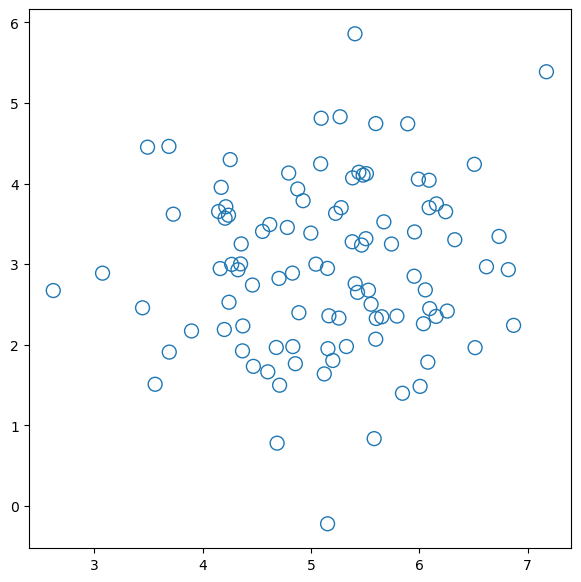

In [81]:
# dataset 1cluster : (100, 2) dataset

# method 1
x_data = np.random.normal(5, 1, size=(100, 1))
y_data = np.random.normal(3, 1, size=(100, 1))

print(f'shape of x_data: {x_data.shape}')
print(f'shape of y_data: {y_data.shape}')

# data = np.concatenate((x_data, y_data), axis=0)
xy_set = np.hstack((x_data, y_data))
print(f'shape of xy_set: {xy_set.shape}')

# method 2(한번에 만들기)
data = np.random.normal((5, 3), (1, 1), size=(100, 2))
print(f'shape of data: {data.shape}')
print(f'mean : {np.mean(data, axis=0)}') # axis 중요
print(f'std  : {np.std(data, axis=0)}')

# matplot
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(x_data, y_data, s=100,
           facecolor='None',
           edgecolor='tab:blue',
           linewidth=1)

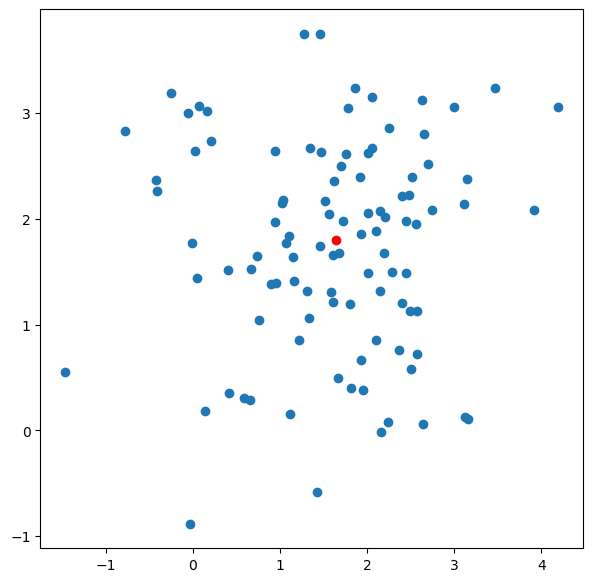

In [125]:
# random centroid
centroid = np.random.uniform(0, 5,size=(2, ))
# centroid = np.random.randint(0, 5,size=(2, ))

data = np.random.normal(loc=(centroid), scale=1, size=(100, 2))

# matplot
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(data[:, 0], data[:, 1])
ax.scatter(centroid[0], centroid[1], c='red',)

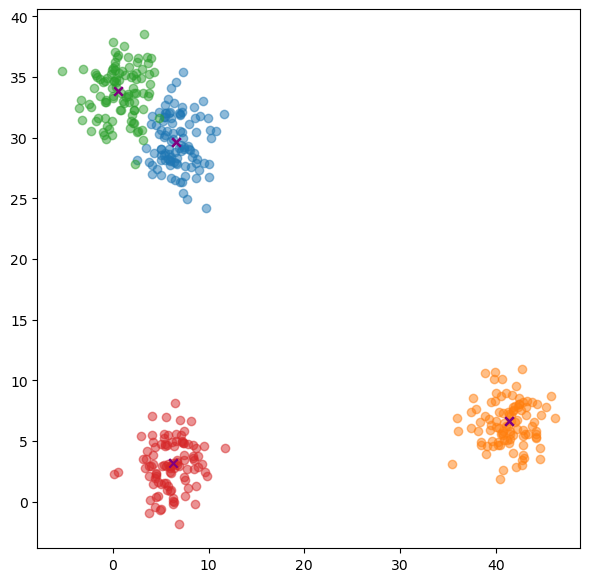

In [348]:
# knn x dataset
# 4 class, class 마다 100개의 점을 가지는 dataset 만들기 -> (400, 2) -> class들의 centroid는 랜덤
centroid = np.random.uniform(0, 50,size=(2, 4))
n_class = len(centroid[0])

dataset = np.array([np.random.normal(centroid[:, i], 2, size=(100, 2)) for i in range(n_class)])
# print(dataset.shape)# (4, 100, 2)

# matplot
fig, ax = plt.subplots(figsize=figsize)
for data in dataset:
    ax.scatter(data[:, 0], data[:, 1], alpha=0.5)
    ax.scatter(centroid[0], centroid[1], marker='x', c='purple') # type: ignore


In [625]:
# target class 값을 부여한다. (= iris의 꽃 종류)
# 모든값이 0, 모양이 (100,)인 ndarray,
# 모든값이 1, 모양이 (100,)인 ndarray,
# 모든값이 2, 모양이 (100,)인 ndarray ... 을 차례대로 출력하기

n_classes = 4
n_data = 100

data = np.hstack([class_idx * np.ones(100,) for class_idx in range(n_classes)])
print(data.shape)
print(data)

(400,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3

In [131]:
import matplotlib.pyplot as plt
import numpy as np
figsize = (7, 7)

sample predict class : 2


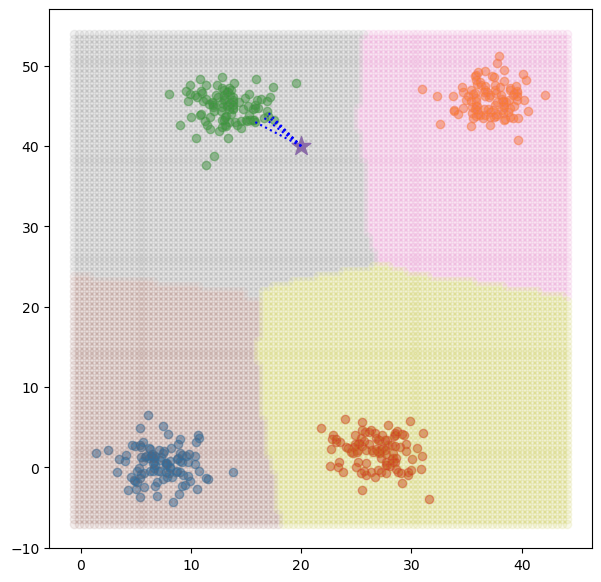

In [177]:
# KNN dataset
np.random.seed(12)
n_classes = 4
n_features = 2
n_data = 100
low = 0
high = 50
centroid = np.random.uniform(low, high, size=(n_features, n_classes))
K = 5

# class dataset
class_data = np.hstack([class_idx * np.ones(n_data,) for class_idx in range(n_classes)])
class_data = class_data.reshape(-1, 1)

# Target data
tmp_data_scale = 2
target_data = np.vstack([np.random.normal(centroid[:, i], tmp_data_scale, size=(n_data, n_features)) for i in range(n_classes)])
# print(target_data.shape) # (n_data*n_classes, n_features)

# function to concatenate data sets
def concat_set(ndarray1, ndarray2):
    return np.concatenate((ndarray1, ndarray2), axis=1)

# function to return the index K
def get_index_K(ndarray1):
    e_dist = np.linalg.norm((ndarray1 - target_data), axis=1).reshape(-1, 1)
    K_idx = np.argsort(e_dist, axis=0)[:K]
    return K_idx

# function to calculate euclidean distance between samples <-> dataset
def predict_class_by_K_idx(k_idx):
    uniques, cnts = np.unique(class_data[k_idx], return_counts=True)
    claxx = int(uniques[np.argmax(cnts)])
    return claxx

# test sample
# sample_data = target_data[258]
sample_data = np.array([20, 40])
# print(f'sample predict class : {predict_class_by_K_idx(get_index_K(sample_data))}')

fig, ax = plt.subplots(figsize=figsize)
for idx_class in range(n_classes):
    ax.scatter(dataset[idx_class*n_data:(idx_class+1)*n_data,0], dataset[idx_class*n_data:(idx_class+1)*n_data,1], alpha=0.5)

ax.scatter(sample_data[0], sample_data[1], marker='*', s=200) # type: ignore


# meshgrid
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

xmesh, ymesh = np.meshgrid(np.linspace(xmin, xmax, n_data), np.meshgrid(np.linspace(ymin, ymax, n_data)))
meshset = concat_set(xmesh.reshape(-1, 1), ymesh.reshape(-1, 1)) #(n_data^2, 2)

# init mesh[2] = 0
zeroset = np.zeros(n_data**2).reshape(-1, 1)
meshset = concat_set(meshset, zeroset) #(n_data^2, 3)

# predict class of meshset
for mesh in meshset:
    mesh[2] = predict_class_by_K_idx(get_index_K(mesh[:n_features]))

# scatter meshset by class
for idx_class in range(n_classes):
    ax.scatter(meshset[meshset[:, n_features]==idx_class, 0], meshset[meshset[:, n_features]==idx_class, 1], alpha=0.1)


# plot nearest 
K_nearest_idx = get_index_K(sample_data)
for k_idx in K_nearest_idx.flatten():
    ax.plot([sample_data[0], target_data[k_idx,0]], [sample_data[1], target_data[k_idx,1]], ls=':', c='b')


In [ ]:

# # function to predict the class of a
# def predict_class_by_K(ndarray) -> int:
#     # print(f'sample data: {ndarray}')
#     K_idx = np.argsort(ndarray, axis=-1)[1:1+K]
#     uniques, cnts = np.unique(dataset[K_idx,n_features], return_counts=True)
#     # print(f'data: {dataset[K_idx,n_features]}')
#     return uniques[np.argmax(cnts)]

# # function to predict the class of a
# def tmp(ndarray) -> int:
#     K_idx = np.argsort(ndarray, axis=-1)[1:1+K]
#     uniques, cnts = np.unique(dataset[K_idx,n_features], return_counts=True)
#     return uniques[np.argmax(cnts)]

# target class & data
dataset = concat_set(target_data, class_data) # (400, 3)

# # euclidean distance by sample data 
# sample_data = dataset[111, :n_features]
# e_dists = e_dists_by_target(sample_data) # (400, 1)
# dataset = concat_set(dataset, e_dists) # (400, 4)

# classify
## argsort # def predict_class_by_K(a):~~~~~
# K_idx = np.argsort(dataset[:,-1], axis=-1)[1:1+K] # dataset[:,-1] == dataset[:,3]
# print(np.sort(e_dists, axis=0)[1:1+K]) # e_dists 오름정렬. 확인용
# print(dataset[K_idx]) # e_dists 오름차순 정렬과 확인. 같으면 정상.
# uniques, cnts = np.unique(dataset[K_idx,n_features], return_counts=True)
# print(f'{uniques}, {cnts}') # set(), counts()
# print(np.argmax(cnts)) # return idex of uniques
# print(f'predict class of sample data : {uniques[np.argmax(cnts)]}') # 에상 class
# print(f'predict class of sample data : {predict_class_by_K(dataset[:,-1])}') # 에상 class
# print(f'predict class of sample data : {predict_class_by_K(e_dists)}') # 에상 class



# KNN visualization
# matplot
fig, ax = plt.subplots(figsize=figsize)
for idx_class in range(n_classes):
    ax.scatter(dataset[idx_class*n_data:(idx_class+1)*n_data,0], dataset[idx_class*n_data:(idx_class+1)*n_data,1], alpha=0.5)

ax.scatter(sample_data[0], sample_data[1], marker='*', s=200) # type: ignore

# meshgrid

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

grid_size = 100
xmesh, ymesh = np.meshgrid(np.linspace(xmin, xmax, grid_size), np.meshgrid(np.linspace(ymin, ymax, grid_size)))
meshset = concat_set(xmesh.reshape(-1, 1), ymesh.reshape(-1, 1)) #(grid_size^2, 2)
zeroset = np.zeros(grid_size**2).reshape(-1, 1)
meshset = concat_set(meshset, zeroset) #(grid_size^2, 3)

# for idx, mesh in np.ndenumerate(meshset):
#     print(f'idx, mesh : {idx}, {mesh}')
#     print(f'e_dists : {e_dists_by_target(mesh)[:5]}')
#     # meshset[idx,2] = predict_class_by_K(e_dists_by_target(mesh))
#     # print('predict mesh class: ',predict_class_by_K(e_dists_by_target(ndarray=mesh)))
#     print(meshset[idx,2])

# Z = e_dists_def(mesh, target_data)

# Z = np.ones(ymesh.shape)*3
# print(Z.shape)
# print(Z)
# print(dataset[:,2].shape)
# plt.contourf(xmesh, ymesh, Z, alpha=0.3, cmap='RdBu')
# plt.contourf(xmesh, ymesh, Z, alpha=0.3, cmap=plt.cm.rainbow)
# ax.scatter(meshx, meshy, marker='o', color='grey', alpha=0.5, s=10)


# A, B = np.meshgrid(np.linspace(xmin, xmax, n_data),
#                    np.linspace(ymin, ymax, n_data))
# print(A.shape)
# print(dataset.shape)
# C = np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)])
# print(C.shape)
# # e_dists_def(C, dataset)
# meshset = np.concatenate((C, e_dists_def(C, dataset[:,:n_features])), axis=1)
# print(meshset.shape)
# dataset = np.concatenate((dataset, e_dists_def(sample_data, dataset[:,:n_features])), axis=1)

# plt.contour(A, B, A, alpha=0.3, cmap=plt.cm.rainbow)